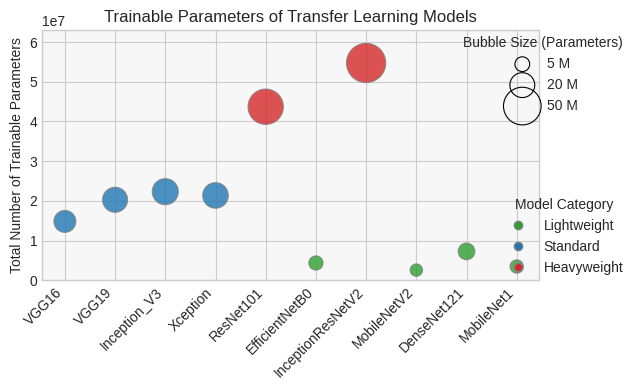

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Data
models = [
    "VGG16", "VGG19", "Inception_V3", "Xception",
    "ResNet101", "EfficientNetB0", "InceptionResNetV2",
    "MobileNetV2", "DenseNet121", "MobileNet1"
]

params = np.array([
    14847044,
    20289092,
    22328356,
    21387052,
    43709316,
    4378535,
    54731236,
    2586948,
    7300932,
    3492292
])

x = np.arange(len(models))

categories = [
    "Standard", "Standard", "Standard", "Standard",
    "Heavyweight", "Lightweight", "Heavyweight",
    "Lightweight", "Lightweight", "Lightweight"
]

cat_to_color = {
    "Lightweight": "#2ca02c",
    "Standard":    "#1f77b4",
    "Heavyweight": "#d62728"
}
colors = [cat_to_color[c] for c in categories]

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(6.5, 4.0))   # journal-friendly aspect ratio
fig.patch.set_facecolor("white")
ax.set_facecolor("#f7f7f7")

# -------- bubble size (publication-friendly) ----------
# 1) normalize to [0,1]
norm = (params - params.min()) / (params.max() - params.min())
# 2) map to an area range [min_area, max_area] in points^2
min_area, max_area = 80, 800   # tune these two numbers only
bubble_size = min_area + norm * (max_area - min_area)

sc = ax.scatter(
    x, params,
    s=bubble_size,
    c=colors,
    alpha=0.8,
    edgecolors="grey",
    linewidths=0.8
)

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.set_ylabel("Total Number of Trainable Parameters")
ax.set_title("Trainable Parameters of Transfer Learning Models")

y_max = params.max()
ax.set_ylim(0, y_max * 1.15)

# ----- size legend (in millions) -----
ref_vals = np.array([5_000_000, 20_000_000, 50_000_000])
ref_norm = (ref_vals - params.min()) / (params.max() - params.min())
ref_sizes = min_area + ref_norm * (max_area - min_area)

size_handles = [
    ax.scatter([], [], s=s,
               facecolors="none",
               edgecolors="black",
               linewidths=0.8)
    for s in ref_sizes
]

size_legend = ax.legend(
    size_handles,
    [f"{v/1e6:.0f} M" for v in ref_vals],
    title="Bubble Size (Parameters)",
    loc="upper right",
    bbox_to_anchor=(1.18, 1.0),
    borderaxespad=0.
)
size_legend.get_frame().set_alpha(0.9)

# ----- color legend (categories) -----
cat_handles = [
    Line2D([0], [0], marker="o", color="none",
           markerfacecolor=cat_to_color["Lightweight"],
           markeredgecolor="grey",
           markersize=6, label="Lightweight"),
    Line2D([0], [0], marker="o", color="none",
           markerfacecolor=cat_to_color["Standard"],
           markeredgecolor="grey",
           markersize=6, label="Standard"),
    Line2D([0], [0], marker="o", color="none",
           markerfacecolor=cat_to_color["Heavyweight"],
           markeredgecolor="grey",
           markersize=6, label="Heavyweight"),
]

cat_legend = ax.legend(
    handles=cat_handles,
    title="Model Category",
    loc="lower right",
    bbox_to_anchor=(1.18, 0.0),
    borderaxespad=0.
)
cat_legend.get_frame().set_alpha(0.9)

ax.add_artist(size_legend)

plt.tight_layout()
plt.show()